In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Mount Google Drive

In [14]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Load dataset from google drive inserting path of a CSV file

In [15]:

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/friend.csv")
data.head()

,ID,size,Age,prize,Number
0,534,34,24,456,5466
1,546,6,23,675,3245
2,550,23,24,2345,12344
3,551,56,24,67,8754
4,552,23,25,32,546


## Preprocess the dataset

In [16]:
# Strip column spaces if any
data.columns = data.columns.str.strip()

# Drop ID column as it is not a useful feature
data = data.drop('ID', axis=1)

## Define features (X) and target (y)

In [17]:

X = data[['size', 'Age', 'prize']]
y = data['Number']

## Split into train and test datasets

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11, 3)
X_test shape: (3, 3)
y_train shape: (11,)
y_test shape: (3,)


## Initialize and train Linear Regression model

In [19]:

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

## Predict on test set

In [20]:

y_pred = model.predict(X_test)

In [21]:
print( y_pred[:5])


[13761.75183332  1694.37480893  6745.11711568]


##  Evaluate the model

In [23]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance on Test Data:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

📊 Model Performance on Test Data:
MAE  = 5085.41
MSE  = 61516888.56
RMSE = 7843.27
R²   = -11.00


## Scatter actual values vs predicted regression line

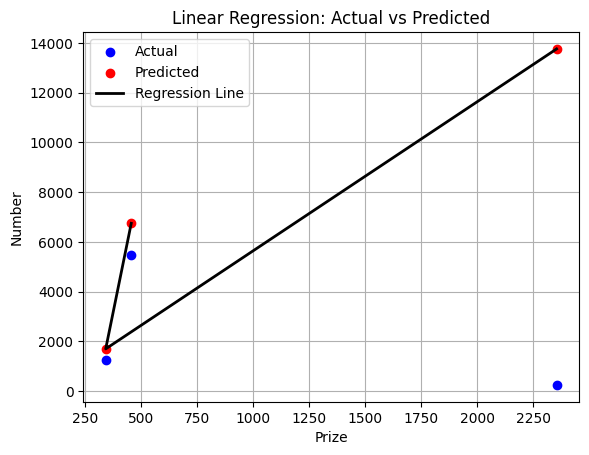

In [24]:

plt.scatter(X_test['prize'], y_test, color='blue', label='Actual')
plt.scatter(X_test['prize'], y_pred, color='red', label='Predicted')  # Plot predicted points
plt.plot(X_test['prize'], y_pred, color='black', linewidth=2, label='Regression Line')  # Optional line

plt.xlabel('Prize')
plt.ylabel('Number')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


## Plot heatmap

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


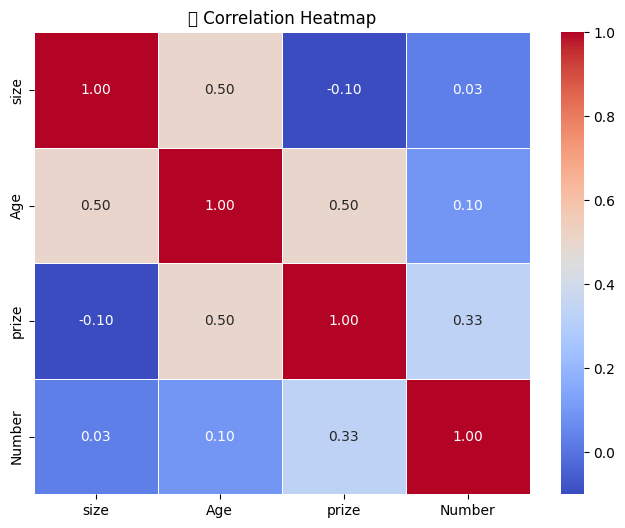

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)  # Ensures only numeric columns are used


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("🔍 Correlation Heatmap")
plt.show()
